In [1]:
%matplotlib inline

import numpy as np
import torch
from torch import Tensor
from torch.autograd import Variable
import torch.optim as opt

import matplotlib.pyplot as plt

In [2]:
############################
# generate data
############################
data_size = 100
split_rate = 0.7
x_dataset = np.linspace(1,10,data_size)
y_dataset = 3*x_dataset + 2 + np.random.randn(data_size)
x_dataset = x_dataset.reshape(-1,1)
y_dataset = y_dataset.reshape(-1,1)

split_idx = int(len(x_dataset)*split_rate)
train_x_dataset = x_dataset[:split_idx]
train_y_dataset = y_dataset[:split_idx]
test_x_dataset = x_dataset[split_idx:]
test_y_dataset = y_dataset[split_idx:]

In [14]:
############################
# construct the model
############################
class LinearRegression(object):
    
    def __init__(self,lr=0.05):
        super(LinearRegression,self).__init__()
        self._w = Variable(torch.randn(1,1),requires_grad=True)
        self._b = b = Variable(torch.zeros(1),requires_grad=True)
        self._opt = opt.Adam([self._w,self._b],lr)
        self._train_costs = []
        
    def train(self,x_dataset,y_dataset,epoch=100,batch_size=10):
        self._train_costs  = []
        for i in range(epoch):
            for j in range(int(np.ceil(len(x_dataset)/float(batch_size)))):
                self._opt.zero_grad()
                x = Variable(Tensor(x_dataset[j:j+batch_size]))
                y = Variable(Tensor(y_dataset[j:j+batch_size]))
                out = x.mm(self._w)
                out += self._b.unsqueeze(0).expand_as(out)
                cost = (out - y).pow(2).mean()
                cost.backward()
                self._opt.step()
                self._train_costs.append(cost.data.numpy()[0])
        return self._train_costs
    
    def test(self,x_dataset,y_dataset):
        x = Variable(Tensor(x_dataset))
        y = Variable(Tensor(y_dataset))
        out = x.mm(self._w)
        out += self._b.unsqueeze(0).expand_as(out)
        cost = (out - y).pow(2).mean()
        return cost

Variable containing:
 9.6262
[torch.FloatTensor of size 1]



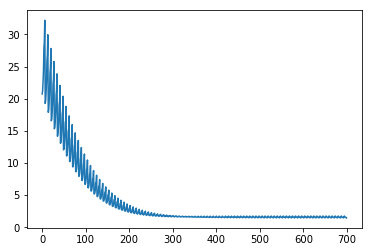

In [16]:
reg = LinearRegression(lr=0.01)
costs = reg.train(train_x_dataset,train_y_dataset)
print reg.test(test_x_dataset,test_y_dataset)
plt.plot(costs)